# STAR DATASET (1) Analysis

## About dataset
The dataset contains information about:
1. Absolute Temperature (in K)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Magnitude (Mv)
5. Star Color (white,Red,Blue,Yellow,yellow-orange etc)
6. Spectral Class (O,B,A,F,G,K,,M)
7. Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**  

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)  
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

## Data analysis  

Load the dataset and look at the data:

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('6 class csv.csv')
data


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


Look at **numerical columns**:

In [2]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Look at **categorical columns**:

In [3]:
data['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [4]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

We see that the values are duplicated in various ways. Let's bring everything to uniformity using **pandas**:

In [5]:
data['Star type'].replace([0,1,2,3,4,5],['Red Dwarf','White Dwarf','Brown Dwarf','Main Sequence','Supergiants','Hypergiants'],inplace=True)

data['Star color'].replace(['Blue White','Blue white','Blue-white','Blue white '],['Blue-White','Blue-White','Blue-White','Blue-White'],inplace=True)
data['Star color'].replace(['Yellowish White'],['Yellowish-White'],inplace=True)
data['Star color'].replace(['Pale yellow orange'],['Pale-Yellow-Orange'],inplace=True)
data['Star color'].replace(['yellow-white'],['Yellow-White'],inplace=True)
data['Star color'].replace(['white'],['White'],inplace=True)
data['Star color'].replace(['yellowish'],['Yellowish'],inplace=True)
data['Star color'].replace(['Blue '],['Blue'],inplace=True)
data['Star color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish-White',
       'Pale-Yellow-Orange', 'Blue', 'Whitish', 'Yellow-White', 'Orange',
       'White-Yellow', 'Yellowish', 'Orange-Red'], dtype=object)

And another one categorical variable:our target **Star type** is a nominal variable (contains values that have no intrinsic ordering).  
Let's restore the original name so that there is no ordering illusion.

In [6]:
data['Star type'].replace([0,1,2,3,4,5],['Red Dwarf','White Dwarf','Brown Dwarf','Main Sequence','Supergiants','Hypergiants'],inplace=True)

### Dependence of variables

#### Categorial variables  
We have the next 3 continuous variables including target: Star type (target), Star color, Spectral Class  
Using **chi-square** to determine if they are dependent on each other

In [7]:
def chi_square(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
  
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p


In [8]:

chi_score, degree_f, p = chi_square(data,'Spectral Class','Star type')
print('Spectral Class vs Star type')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}\n')

chi_score, degree_f, p = chi_square(data,'Star color','Star type')
print('Star color vs Star type')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}\n')

chi_score, degree_f, p = chi_square(data,'Star color','Spectral Class')
print('Star color vs Spectral Class')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}\n')

Spectral Class vs Star type
Chi2_score: 328.39273009717215, Degrees of freedom: 30, p-value: 6.361278506929771e-52

Star color vs Star type
Chi2_score: 358.3949477351917, Degrees of freedom: 55, p-value: 4.3505538091432946e-46

Star color vs Spectral Class
Chi2_score: 784.3518525964561, Degrees of freedom: 66, p-value: 1.941945752112993e-123



Using Chi-square Distibution Table (for example: [Chi-square Table](https://www.mathsisfun.com/data/chi-square-table.html)) we can see that for p = 0.05 the critical chi-square region is:
1) Spectral Class vs Star type: 43.77  
2) Star color vs Star type: 79.08  
3) Star color vs Spectral Class: about 90  

It mean that chi-square values is greater than critical chi-square, it therefore the null hypothesis is rejected and the alternate hypothesis is accepted: **the 2 categorical variables being compared are dependent on each other**.

Also we can see that calculated p-vaules less than critical p-values (p = 0.05)


> <div class="alert alert-block alert-info">
<b>Conclusions :</b> <br>
    1) Spectral Class and Star color are correlated with target and could be included for training in our model. <br>
    2) Spectral Class and Star color are correlated with each other, therefore we will need to exclude some of them from the learning model. About this below. </div>

#### Categorial and numerical variables (ANOVA method)

It is useful to visualize the distribution of the data using a Boxplot. We are interested in the following sets:  
1) Star type vs Absolute magnitude(Mv)  
2) Star type vs Radius(R/Ro)  
3) Star type vs Luminosity(L/Lo)  
4) Star type vs Temperature (K)

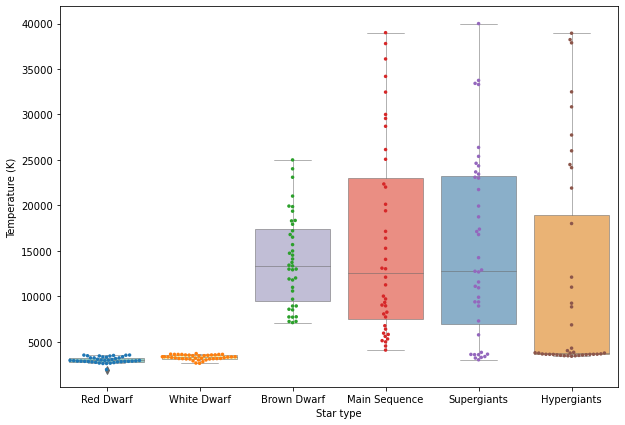

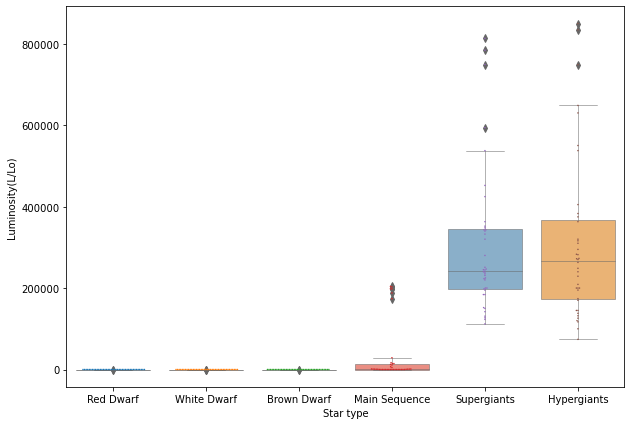

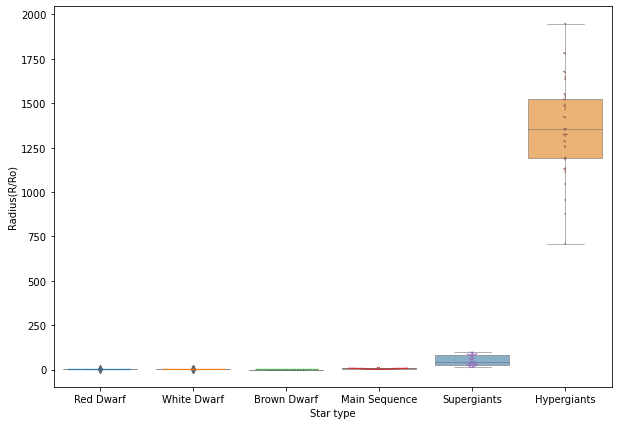

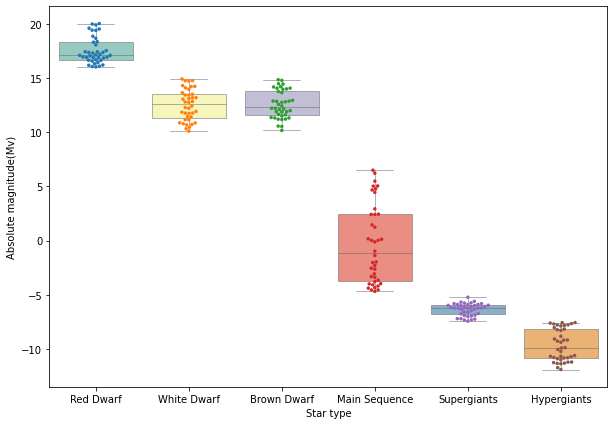

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.boxplot(x="Star type", y="Temperature (K)", data=data, palette="Set3", linewidth=0.5)
sns.swarmplot(x="Star type", y="Temperature (K)", data=data, size=3.5)
plt.show()
plt.figure(figsize=(10,7))
sns.boxplot(x="Star type", y="Luminosity(L/Lo)", data=data, palette="Set3", linewidth=0.5)
sns.swarmplot(x="Star type", y="Luminosity(L/Lo)", data=data, size=1.5)
plt.show()
plt.figure(figsize=(10,7))
sns.boxplot(x="Star type", y="Radius(R/Ro)", data=data, palette="Set3", linewidth=0.5)
sns.swarmplot(x="Star type", y="Radius(R/Ro)", data=data, size=1.5)
plt.show()
plt.figure(figsize=(10,7))
sns.boxplot(x="Star type", y="Absolute magnitude(Mv)", data=data, palette="Set3", linewidth=0.5)
sns.swarmplot(x="Star type", y="Absolute magnitude(Mv)", data=data, size=3.5)
plt.show()

The features seem to correlate with the target. Let's check it using ANOVA.

We have some sets of categorial vs numerical variables and let's write a function that implements the ANOVA method by hand  
Firstly we write a function that will build a table for one set (categorial vs numerical)

In [10]:
def comp_df(data, col_num, col_categ):    
    #---create the contingency table---
    df = pd.DataFrame(data, columns=[col_num, col_categ])
    
    uniq = df[col_categ].unique()
    data_comp = pd.DataFrame()
    
    #---form a table where the columns will be categorical features, and the values will be numerical--
    for value in uniq:
        data_uniq = df.loc[df[col_categ] ==  value]
        data_uniq.reset_index(drop=True, inplace=True)
        data_comp[value] = data_uniq[col_num]
    
    #---fill in gaps with median values---
    data_comp = data_comp.fillna(data_comp.median(axis=0), axis=0)
    return data_comp

In [11]:
#check how it works
comp_df(data,'Temperature (K)','Spectral Class')

,M,B,A,F,O,K,G
0,3068,25000.0,7740.0,7220.0,39000.0,4526.0,6850.0
1,3042,16500.0,8500.0,12990.0,36108.0,4077.0,6850.0
2,2600,30000.0,8570.0,7700.0,40000.0,4980.0,6850.0
3,2800,15276.0,8052.0,11790.0,23000.0,5112.0,6850.0
4,1939,9700.0,8930.0,7230.0,17120.0,4015.0,6850.0
...,...,...,...,...,...,...,...
106,3598,18850.0,9030.0,7230.0,22369.0,4406.5,6850.0
107,3142,18850.0,9030.0,7230.0,22369.0,4406.5,6850.0
108,3496,18850.0,9030.0,7230.0,22369.0,4406.5,6850.0
109,3324,18850.0,9030.0,7230.0,22369.0,4406.5,6850.0


Now we write a function that will implements the method ANOVA

In [12]:
def f_score_anova(data):
    # number of items in each group
    n = data.shape[0]
    # number of groups
    k = data.shape[1]
    # number of observations
    observation_size = n*k

    # group means and overall mean
    data.loc['Group Means'] = data.mean()
    overall_mean = data.iloc[-1].mean()
    
    # calculate Sum of squares of all observation, SS_total = SS_between + SS_within
    SS_total = (((data.iloc[:-1] - overall_mean)**2).sum()).sum()
    # calculate sum of squares within is the sum of squared deviations of scores around their group’s mean
    SS_within = (((data.iloc[:-1] - data.iloc[-1])**2).sum()).sum()
    # calculate the sum of squares of the group means from the overall mean:
    SS_between = (n * (data.iloc[-1] - overall_mean)**2).sum()

    # compute the various degrees of freedoms
    df_total = observation_size - 1       
    df_within = observation_size - k      
    df_between = k - 1
    print('df1 between =', df_between)
    print('df2 within =', df_within)
    
    # compute the various mean squared values
    mean_sq_between = SS_between / (k - 1)
    mean_sq_within = SS_within / (observation_size - k)

    # calculate the F-value, which is the ratio of two variances
    F = mean_sq_between / mean_sq_within

    return F

In [13]:
data_comp = comp_df(data,'Radius(R/Ro)','Star type')
F = f_score_anova(data_comp)
print('F = ', '%.2f' % F)

# also we can compare our def f_score_anova with using the Stats module to calculate f-score
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(*data_comp.iloc[:-1,0:6].T.values)
print('F (Stats module)=','%.2f' % fvalue, 'p-value (Stats module)', pvalue)


df1 between = 5
df2 within = 234
F =  1113.91
F (Stats module)= 1113.91 p-value (Stats module) 6.384847537214598e-161


Using F Distibution Table (for example: [F Table](http://www.socr.ucla.edu/Applets.dir/F_Table.html)) we can see that for alpha = 0.05 the critical F region is about 2.2141

It mean that our F-values (F=1113,91) is greater than critical F-value, it therefore the null hypothesis is rejected and the alternate hypothesis is accepted: **the 2 categorical variables being compared are dependent on each other**.

Also we can see that calculated p-vaules less than critical p-values (p = 0.05)

Let's check all sets "Categorial and numerical variables"

In [14]:
numeric_columns_name = [c for c in data.columns if data[c].dtype.name != 'object']

for value in numeric_columns_name:
    print(value,'vs Star type:')
    data_comp = comp_df(data,value,'Star type')
    F = f_score_anova(data_comp)
    print('F = ', '%.2f' % F)
    print()

Temperature (K) vs Star type:
df1 between = 5
df2 within = 234
F =  22.10

Luminosity(L/Lo) vs Star type:
df1 between = 5
df2 within = 234
F =  75.60

Radius(R/Ro) vs Star type:
df1 between = 5
df2 within = 234
F =  1113.91

Absolute magnitude(Mv) vs Star type:
df1 between = 5
df2 within = 234
F =  1496.53



There is variance in all our different groups (you can verify this by looking at the [F Table](http://www.socr.ucla.edu/Applets.dir/F_Table.html))

> <div class="alert alert-block alert-info">
<b>Conclusions :</b> <br> All numerical features are correlated with target and could be included for training in our model. </div>

Next check how numerical features are correlated with other categorial variables: Spectral Class and Star color

In [15]:
for value in numeric_columns_name:
    print(value,'vs Spectral Class:')
    data_comp = comp_df(data,value,'Spectral Class')
    F = f_score_anova(data_comp)
    print('F = ', '%.2f' % F)
    print()

Temperature (K) vs Spectral Class:
df1 between = 6
df2 within = 770
F =  734.82

Luminosity(L/Lo) vs Spectral Class:
df1 between = 6
df2 within = 770
F =  200.25

Radius(R/Ro) vs Spectral Class:
df1 between = 6
df2 within = 770
F =  371.10

Absolute magnitude(Mv) vs Spectral Class:
df1 between = 6
df2 within = 770
F =  260.92



And one plot for max F-score

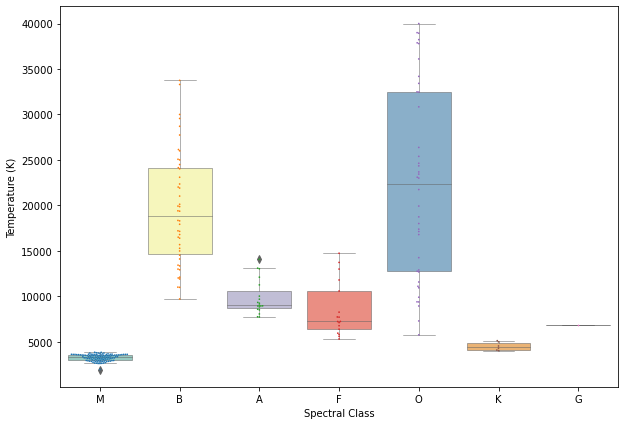

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Spectral Class", y="Temperature (K)", data=data, palette="Set3", linewidth=0.5)
sns.swarmplot(x="Spectral Class", y="Temperature (K)", data=data, size=1.7)
plt.show()

In [17]:
for value in numeric_columns_name:
    print(value,'vs Star color:')
    data_comp = comp_df(data,value,'Star color')
    F = f_score_anova(data_comp)
    print('F = ', '%.2f' % F)
    print()

Temperature (K) vs Star color:
df1 between = 11
df2 within = 1332
F =  561.27

Luminosity(L/Lo) vs Star color:
df1 between = 11
df2 within = 1332
F =  792.24

Radius(R/Ro) vs Star color:
df1 between = 11
df2 within = 1332
F =  432.20

Absolute magnitude(Mv) vs Star color:
df1 between = 11
df2 within = 1332
F =  375.21



And one plot for max F-score

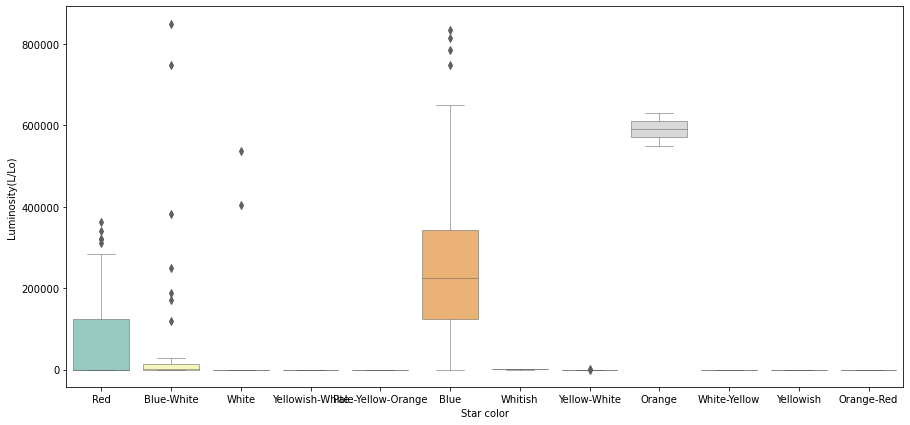

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Star color", y="Luminosity(L/Lo)", data=data, palette="Set3", linewidth=0.5)
plt.show()

#### Numeric variables  
We have the next 4 continuous variables: Temperature (K), Luminosity(L/Lo), Radius(R/Ro), Absolute magnitude(Mv).  
Using seaborn let's see Pearson correlation of continuous variables

<AxesSubplot:>

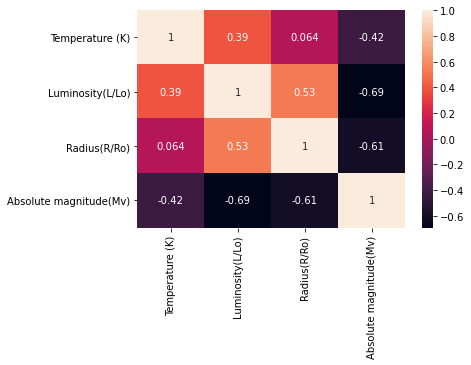

In [19]:
sns.heatmap(data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].corr(), annot=True)

We observe **high degree** linear relationship between:  
* Absolute magnitude(Mv) and Luminosity(L/Lo)
* Radius(R/Ro) and Absolute magnitude(Mv)
* Radius(R/Ro) and Luminosity(L/Lo)  

And **moderate degree** linear relationship between:
* Absolute magnitude(Mv) and Temperature (K)
* Luminosity(L/Lo) and Temperature (K)

Also let's check the Spearman’s Rank Correlation Coefficient

<AxesSubplot:>

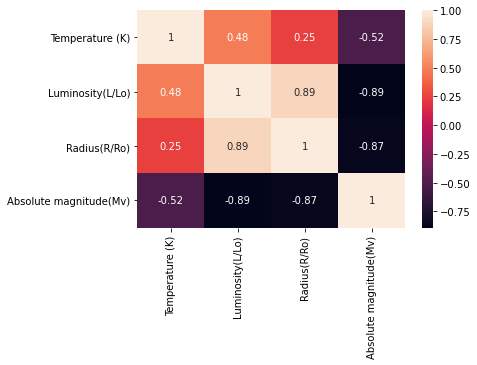

In [20]:
sns.heatmap(data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].corr(method='spearman'), annot=True)

So our continuous variables has monotonic relationships.  
Look at pairwise dependence of numerical variables using Seaborn module

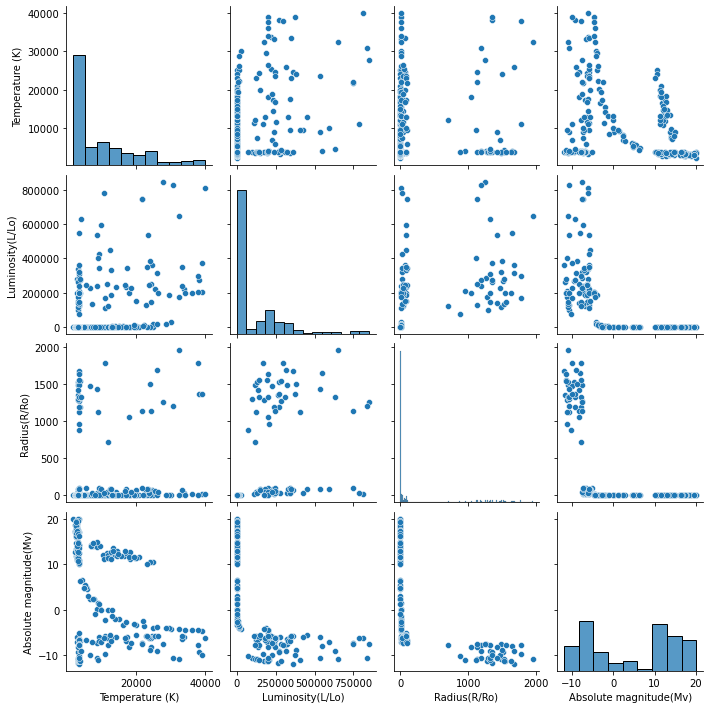

In [21]:
sns.pairplot(data)

> <div class="alert alert-block alert-info">
<b>Conclusions :</b> <br> Our variables (not target) depend on each other, therefore we will need to exclude some of them from the learning model </div>

##### Multicollinearity for numerical variables  
To exclude some of numerical variables using VIF — Variance Inflation Factor.  
VIF allows you to determine the strength of the correlation between the various independent variables. It is calculated by taking a variable and regressing it against every other variables.

In [22]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):
    vif, tolerance = {}, {}
    # all the features that you want to examine 
    for feature in features:
    # extract all the other features you will regress against
        X = [f for f in features if f != feature] 
        X, y = df[X], df[feature]
        
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)
        # calculate tolerance 
        tolerance[feature] = 1 - r2
        
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])

        #return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [23]:
calculate_vif(df=data, features= ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'])

,VIF,Tolerance
Temperature (K),1.371355,0.729206
Luminosity(L/Lo),2.086649,0.479237
Radius(R/Ro),1.810867,0.552222
Absolute magnitude(Mv),2.558650,0.390831


For information:
* 1 — features are not correlated
* VIF = [1,5] — features are moderately correlated
* VIF > 5 — features are highly correlated
* VIF > 10 — high correlation between features and is cause for concern



> <div class="alert alert-block alert-info">
<b>Conclusions :</b> <br> So our features are moderately correlated, but not highly correlated. Аor now, let's hold all the features for the learning models. </div>

### Dataset visualization

Firstly look how numerical variables are distributed

array([[<AxesSubplot:title={'center':'Temperature (K)'}>,
        <AxesSubplot:title={'center':'Luminosity(L/Lo)'}>],
       [<AxesSubplot:title={'center':'Radius(R/Ro)'}>,
        <AxesSubplot:title={'center':'Absolute magnitude(Mv)'}>]],
      dtype=object)

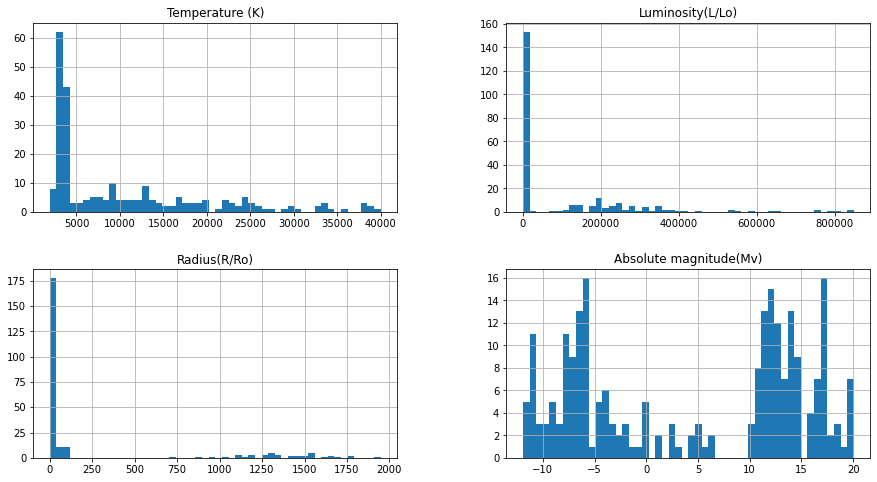

In [24]:
data.hist(bins=50 , figsize=(15,8))

We see that a significant part of the Temperature, Luminosity and Radius indicators are in the range close to zero relative to the maximum values.
Add сommon logarithm of the Temperature, Luminosity and Radius to our dataset

In [25]:
data['LOG(Luminosity(L/Lo))'] = np.log10(data['Luminosity(L/Lo)'])
data['LOG(Radius(R/Ro))'] = np.log10(data['Radius(R/Ro)'])
data['LOG(Temperature (K))'] = np.log10(data['Temperature (K)'])

array([[<AxesSubplot:title={'center':'LOG(Temperature (K))'}>,
        <AxesSubplot:title={'center':'LOG(Luminosity(L/Lo))'}>],
       [<AxesSubplot:title={'center':'LOG(Radius(R/Ro))'}>,
        <AxesSubplot:title={'center':'Absolute magnitude(Mv)'}>]],
      dtype=object)

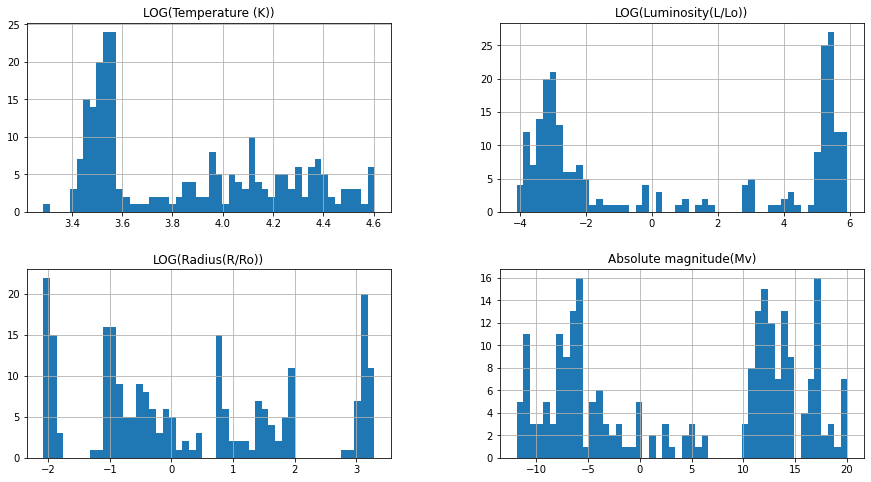

In [26]:
data.hist(column = ['LOG(Temperature (K))','LOG(Luminosity(L/Lo))', 'LOG(Radius(R/Ro))', 'Absolute magnitude(Mv)'],bins=50 , figsize=(15,8))

Build a graph using seaborn.replot. This allows you to display a lot of information at once.

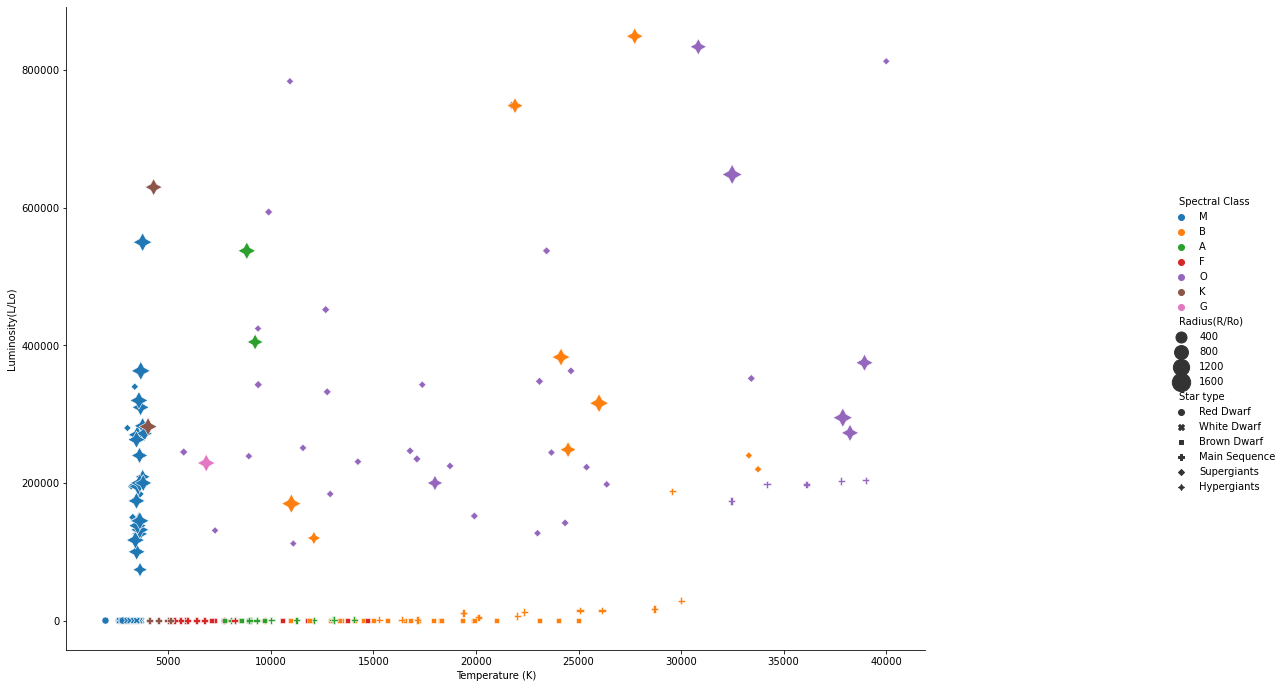

In [27]:
g =sns.relplot(
    data=data,
    x="Temperature (K)", y="Luminosity(L/Lo)",
    hue="Spectral Class", style="Star type",size="Radius(R/Ro)", sizes = (50,400)
)

g.fig.set_figheight(10)
g.fig.set_figwidth(20)

We see that most of the values are lost closer to zero, which makes it impossible to look at the whole picture.  
Let's use the previously calculated logarithms.

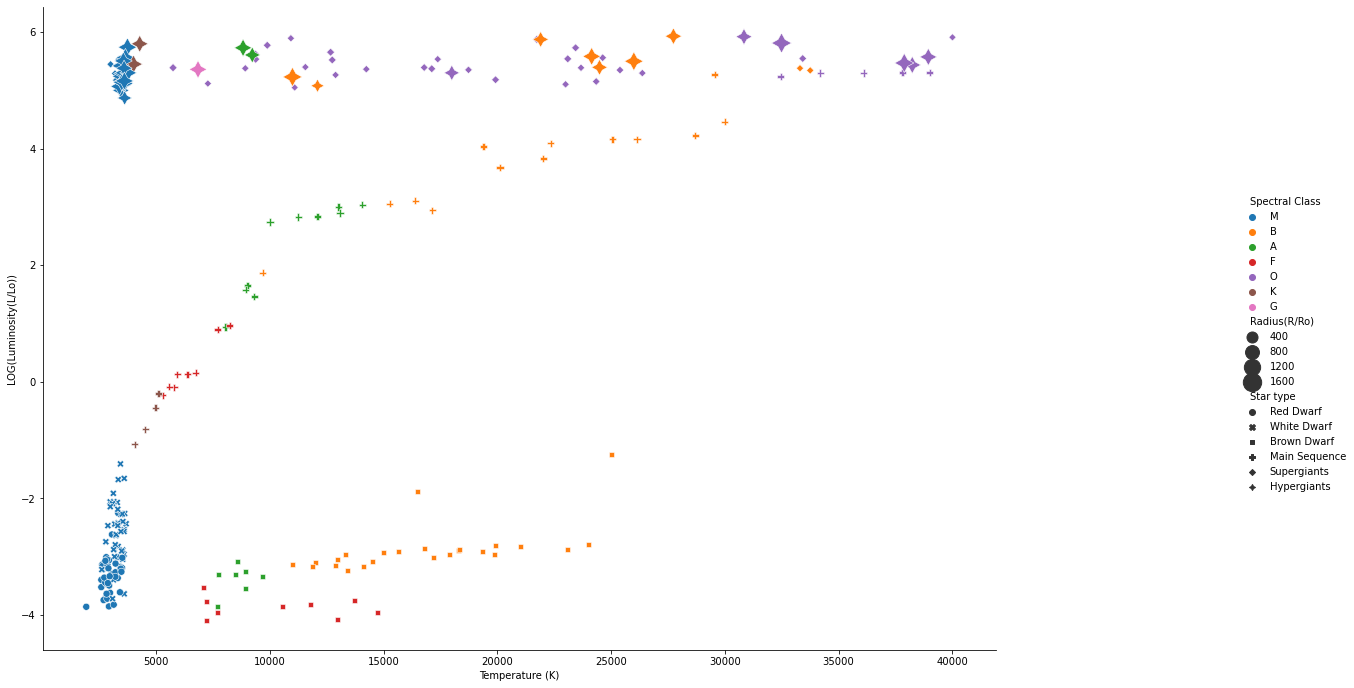

In [28]:
g =sns.relplot(
    data=data,
    x="Temperature (K)", y="LOG(Luminosity(L/Lo))",
    hue="Spectral Class", style="Star type",size="Radius(R/Ro)", sizes = (50,400)
)

g.fig.set_figheight(10)
g.fig.set_figwidth(20)

And now we see Hertzsprung–Russell diagram, where also contains information about Luminosity, Temerature, Spectral class, Radius and target: Star type.  


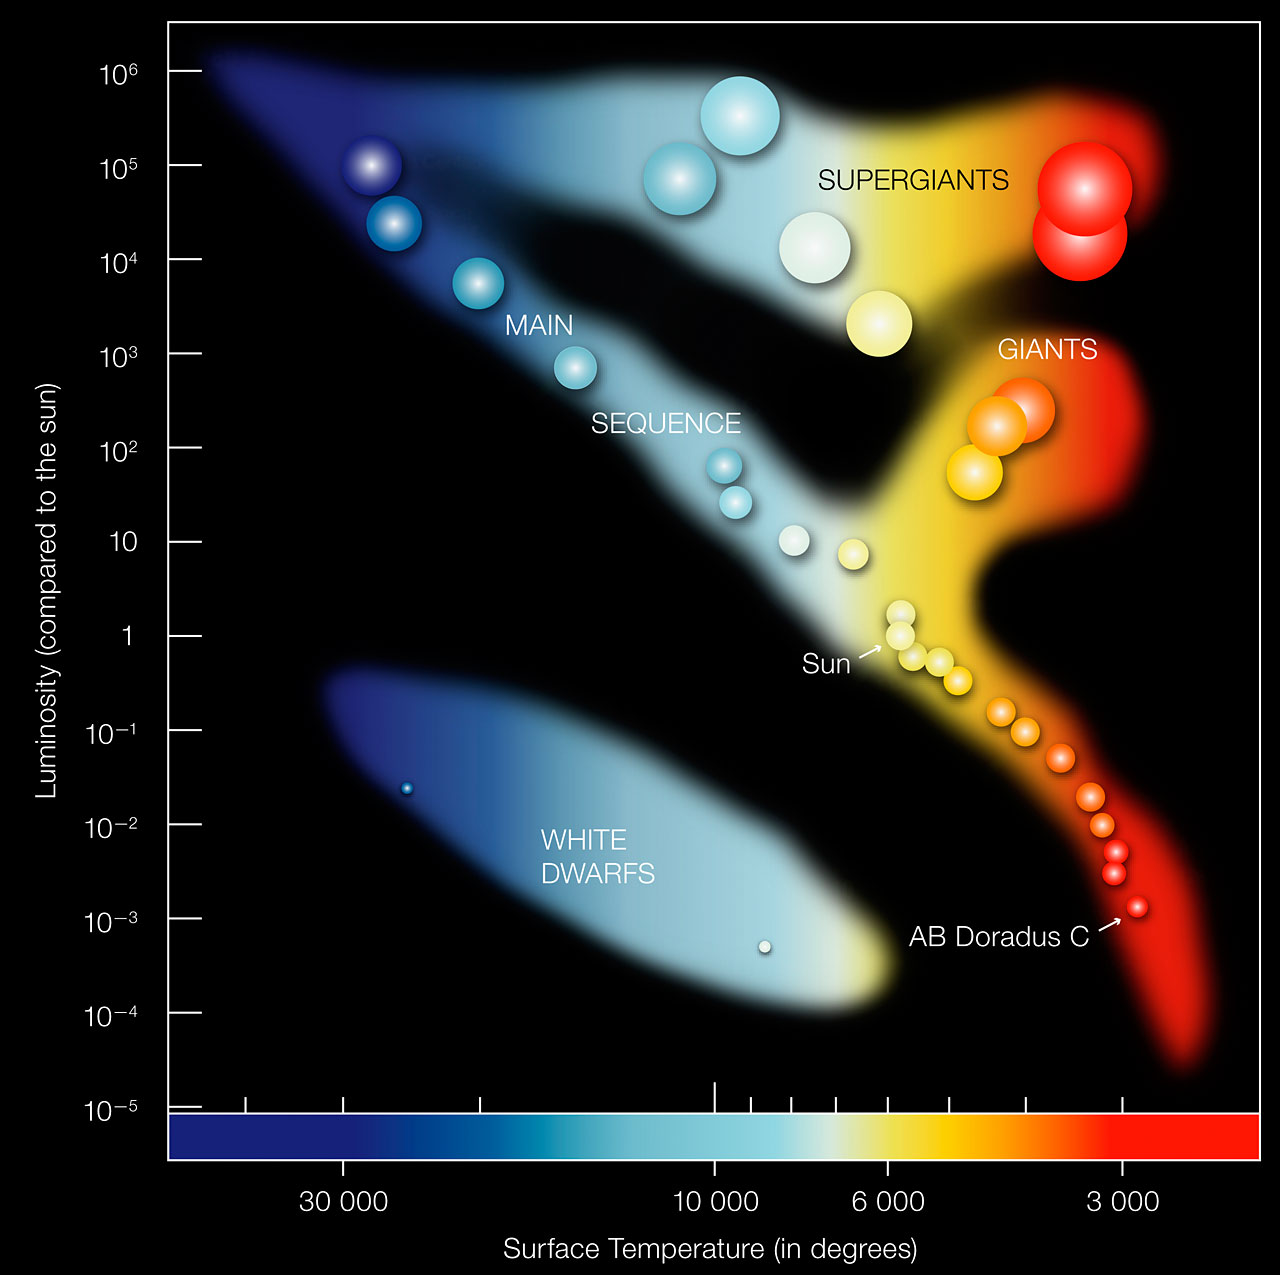

**Continuation:** In the next notebook we will start machine learning.